In [0]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1WdrjrDmyRlIvXhtSlwwcmqEwjg966qRp"})   # replace the id with id of file you want to access
downloaded2 = drive.CreateFile({'id':"1vN5qL2Rpd4Fuw2yNe26zLEVt1GU5cYuu"})
downloaded1.GetContentFile('fashion-mnist_train.csv')        # replace the file name with your file
downloaded2.GetContentFile('fashion-mnist_test.csv')        # replace the file name with your file


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


**Assignment 8 (3 Marks)**
1. Make a Neural network by using Tensorflow to find the image label with high accuracy. Report accuracy in both training and test sets. Input layer should have 784 units and output layer should have 10 units. (2)

2. By having a single RELU unit in the output layer, try to find the label of the set using a regression approach. (1)

The codes below are just to help you understand the data structure. Please take guidance from Assignement 6 on the way to proceed.


In [0]:
#import libraries
import tensorflow as tf;
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random;

In [0]:
#data file
fashion_Train = pd.read_csv('fashion-mnist_train.csv')
fashion_Train = shuffle(fashion_Train)

In [0]:
fashion_Test = pd.read_csv('fashion-mnist_test.csv')
fashion_Test = shuffle(fashion_Test)

In [0]:
fashion_Train_Y = np.array(fashion_Train['label']);
fashion_Test_Y = np.array(fashion_Test['label']);

In [0]:
fashion_Train_X = fashion_Train.drop(columns = 'label')
fashion_Test_X = fashion_Test.drop(columns = 'label')

In [0]:
#reshaping to view
np.array(fashion_Train_X.iloc[[0]]).reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 166,
        171, 194, 185, 170, 134,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 216, 234, 230,
        199, 230, 180, 204, 243, 227,  26,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 111, 241, 201, 218,
        254, 213, 234, 234, 214, 226, 206,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23, 194, 212, 196, 238,
         38,   0, 125, 255, 199, 195, 204,  81,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  33, 199, 213, 198, 201, 248,
         34,   0, 120, 255, 172, 196, 184, 201,  89,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0, 124, 203, 190, 208, 165, 195,
        244, 248, 255, 228, 185, 180, 182, 192, 185,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, '6')

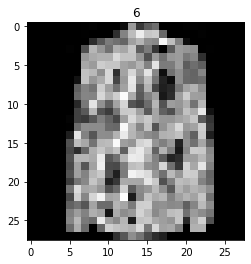

In [0]:
image_Index = 1; # You may change this index and see the images below and values in next two blocks
plt.imshow(np.array(fashion_Train_X.iloc[[image_Index]]).reshape(28,28), cmap = 'gray')
plt.title(fashion_Train_Y[image_Index])

In [0]:
#output conversion in an array for each output
fashion_Train_Y_Cat = tf.keras.utils.to_categorical(fashion_Train_Y);
fashion_Test_Y_Cat= tf.keras.utils.to_categorical(fashion_Test_Y);

In [0]:
#example
fashion_Train_Y_Cat[image_Index]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
a= fashion_Train_X.shape   # the no of images count is stored in a
print(a)                   # the count is printed
input_layer_size  = a[1];  # 28x28 Input Images of Digits
hidden_layer_size = 25;    # 25 hidden units
num_labels = 1;            # one output unit
lambd = 2;                 # initializing constant
alpha = 2;  

(60000, 784)


In [0]:
#initializing the theta values
theta1 = np.zeros([input_layer_size+1, hidden_layer_size]);
theta2 = np.zeros([hidden_layer_size+1, num_labels]);

In [0]:
#adjusting theta's
epsilon_init = 0.1;
theta1 = np.random.uniform(low=0, high=1, size=(input_layer_size+1, hidden_layer_size)) * 2 * epsilon_init - epsilon_init;

epsilon_init = 0.1;
theta2 = np.random.uniform(low=0, high=1, size=(hidden_layer_size+1, num_labels)) * 2 * epsilon_init - epsilon_init;

In [0]:
#definig RELU function
def relu(x):
  return np.maximum(0,x);

In [0]:
#defing relu gradient function
def reluGradient(z):
  return np.where(z > 0, 1.0, 0.0);

In [0]:
#element wise multiplying the theta and the X train set 
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), fashion_Train_X), axis = 1),theta1);

In [0]:
first_Layer_Output = relu(Z1); #first layer output
print(first_Layer_Output.shape,first_Layer_Output)

(60000, 25) [[  0.          76.38437181   0.         ...  30.94916552 247.56212428
    0.        ]
 [  0.         117.54533031  90.57515524 ...  62.15279132  78.35598473
    0.        ]
 [  0.           0.           0.         ...   0.         106.50916367
   95.27954358]
 ...
 [  0.          76.31443485  82.16428725 ... 122.68359696 247.87527752
    0.        ]
 [  0.          10.93698823   7.81654482 ...   0.         346.956742
    0.        ]
 [  0.           0.         207.28208386 ...   0.          29.94633299
    0.        ]]


In [0]:
a= first_Layer_Output.shape  #shape of the first layer
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2); #estimated output of layer 2
second_Layer_Output = relu(Z2); #getting its probabilistic output
second_Layer_Output=normalize(second_Layer_Output);     #2nd layer shape
print(second_Layer_Output)

[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [0]:
YMat = np.zeros(second_Layer_Output.shape); #creating a matrix of same dimension as second layer
a = second_Layer_Output.shape;              #storing its shape 
YMat.shape 


(60000, 1)

In [0]:

for i in range(0,a[0]):
    YMat[i] = fashion_Train_Y[i]/9;
print(YMat)

[[0.44444444]
 [0.66666667]
 [0.55555556]
 ...
 [0.44444444]
 [0.33333333]
 [0.44444444]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


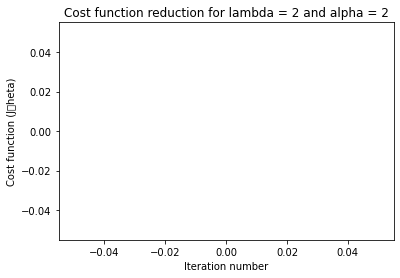

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


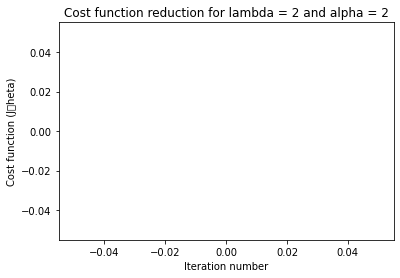

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


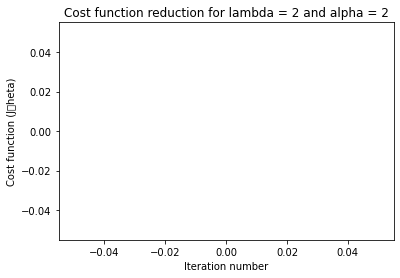

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


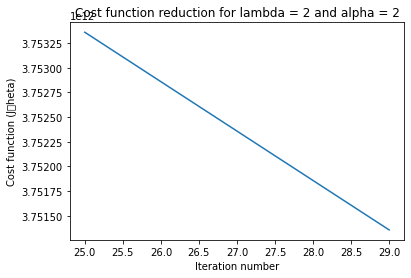

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


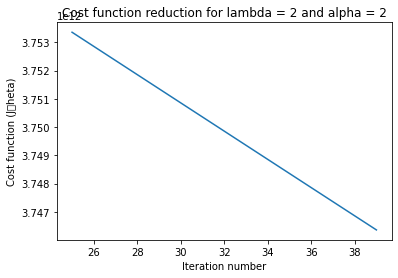

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


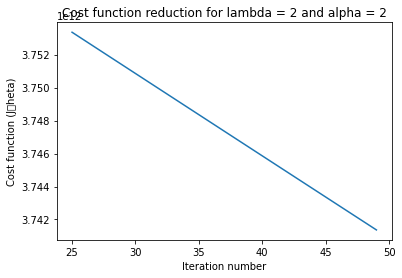

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


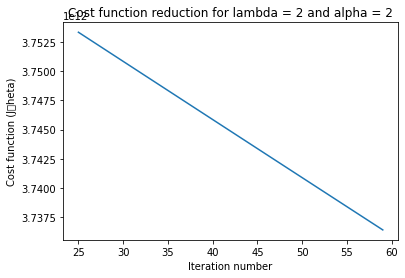

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


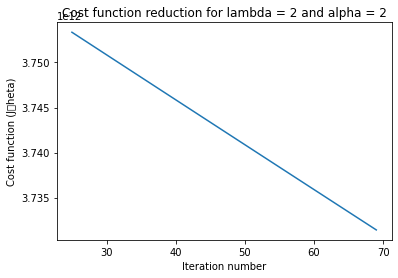

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


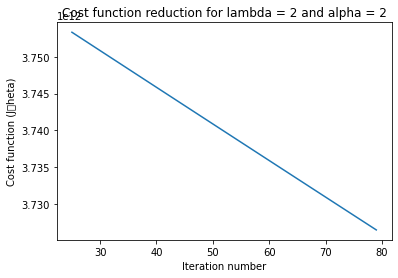

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


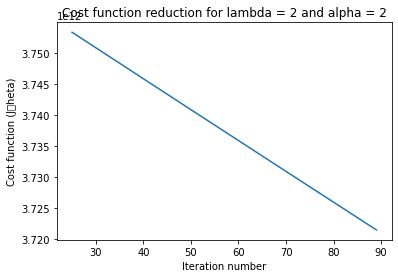

In [0]:
no_of_Interations = 100;  #TAKING 100 iterartions
J = np.zeros([no_of_Interations,1]); #considering a column vector os 100 rows 

for i in range(0,no_of_Interations):
  a= fashion_Train_X.shape;  #shape of the training set is stored
  Z1 = np.dot(np.concatenate((np.ones([a[0],1]), fashion_Train_X), axis = 1),theta1); #Output is calculated 
  first_Layer_Output = relu(Z1); #finding sigmoid of it i.e probabilistic value between 0-1

  a= first_Layer_Output.shape #shape of the output of first layer i.e sigmoid is stored
  Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);  #Output is calculated 
  second_Layer_Output = relu(Z2); #finding sigmoid of output i.e probabilistic value between 0-1
  
  J[i] = (-1/a[1])*np.sum(YMat*np.log(second_Layer_Output) + (1-YMat)*np.log(1-second_Layer_Output)) + (lambd/(2*a[1]))*np.sum(theta1[1:,:]*theta1[1:,:]) + (lambd/(2*a[1]))*np.sum(theta2[1:,:]*theta2[1:,:]); #finding the cost function value
  
  da2dz2 = (second_Layer_Output - YMat); #error is calculated predicted values - actual value
  da1dz1 = da2dz2.dot(np.transpose(theta2[1:,:]))*reluGradient(Z1);
  
  
  b = second_Layer_Output.shape;
  Theta2_grad = np.dot(np.transpose(np.concatenate((np.ones([a[0],1]), first_Layer_Output),1)),da2dz2);  #theta2_grad = A1 * d(J)/dZ[2]
  Theta2_grad = Theta2_grad +lambd*np.concatenate((np.zeros([1, b[1]]), theta2[1:,:]),0); #regularing theta2
  
  Theta1_grad = np.dot(np.transpose(np.concatenate((np.ones([a[0],1]), fashion_Train_X),1)),da1dz1); #theta1_grad = A1 * d(J)/dZ[1]
  Theta1_grad = Theta1_grad + lambd*np.concatenate((np.zeros([1, a[1]]), theta1[1:,:]),0); #regularing theta2
  
  Theta2_grad = Theta2_grad/a[0]; #averaging by total number of elements present
  Theta1_grad = Theta1_grad/a[0]; #averaging by total number of elements present
  
  theta1 = theta1- alpha*Theta1_grad; #theta updating after iteration
  theta2 = theta2 - alpha*Theta2_grad; #theta updating after iteration

  if(i%10 == 0): #plotting for every 10 iterations
    plt.plot(J[0:i]); #fugure number
    plt.title('Cost function reduction for lambda = '+ str(lambd)+ ' and alpha = '+ str(alpha)); #fugure title 
    plt.xlabel('Iteration number'); #fugure x label
    plt.ylabel('Cost function (J\theta)');#figure y label
    plt.show();  #show figure
    plt.pause(0.05);# Pause for 0.05 seconds



In [0]:
#Evaluation of training set%%
a= fashion_Train_X.shape;
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), fashion_Train_X), axis = 1),theta1); #calculating preactivation Z1 =X^T*theta1 #^T indicates  transpose
first_Layer_Output = relu(Z1);  #calcluating the activation value using sigmoid function for Z1 so as to limit the value between 0-1

a= first_Layer_Output.shape
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);  #calculating preactivation Z2 =X^T*theta2 #^T indicates transpose 
second_Layer_Output = relu(Z2);  #calcluating the activation value using sigmoid function for Z2 so as to limit the value between 0-1

I = np.zeros(fashion_Train_Y.shape);           #initialising matrix of shape of y 
training_Error_Percentage = 0;   #initialising value
for i in range(0,a[0]):          
    I[i] = np.rint(second_Layer_Output[i]*9); #returns the maximum value along the axis
    if(I[i] == fashion_Train_Y[i]):
      training_Error_Percentage = training_Error_Percentage+1;   #accuracy calculation
training_Error_Percentage = 100*training_Error_Percentage/a[0];
print(training_Error_Percentage)                                 #percentage of accuracy

10.0


In [0]:
print(I,fashion_Train_Y)

[8. 8. 8. ... 8. 8. 8.] [4 6 5 ... 4 3 4]


In [0]:
#Evaluation of test set


a= fashion_Test_X.shape;
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), fashion_Test_X), axis = 1),theta1); #calculating preactivation Z1 =X^T*theta1 #^T indicates  transpose
first_Layer_Output = relu(Z1);  #calcluating the activation value using sigmoid function for Z1 so as to limit the value between 0-1

a= first_Layer_Output.shape
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);#calculating preactivation Z2 =X^T*theta2 #^T indicates transpose 
second_Layer_Output = relu(Z2);          #calcluating the activation value using sigmoid function for Z2 so as to limit the value between 0-1

I = np.zeros(fashion_Test_Y.shape);      #initialising matrix of shape of y 
test_Error_Percentage = 0;       #initialising value
for i in range(0,a[0]):
    I[i] = np.rint(second_Layer_Output[i]*9);    #returns the maximum value along the axis
    if(I[i] == fashion_Test_Y[i]):
      test_Error_Percentage = test_Error_Percentage+1;    #accuracy calculation
test_Error_Percentage = 100*test_Error_Percentage/a[0];
print(test_Error_Percentage)

10.0


1


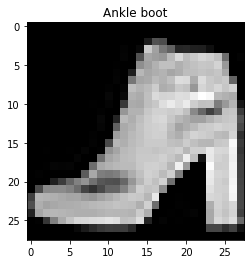

2


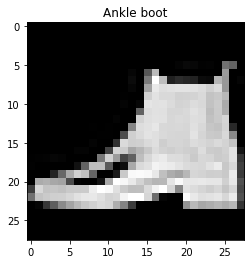

3


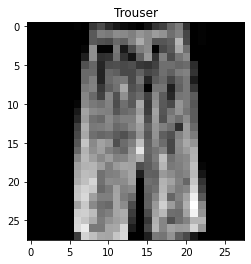

4


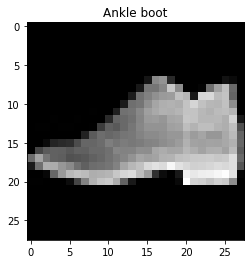

5


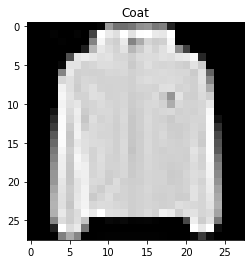

6


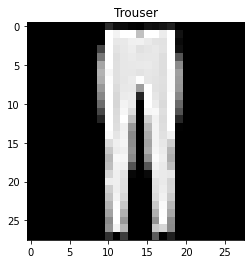

7


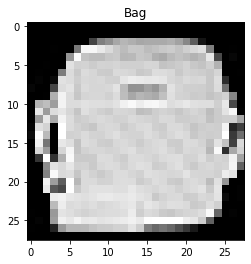

8


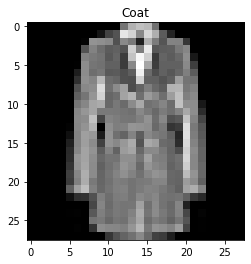

9


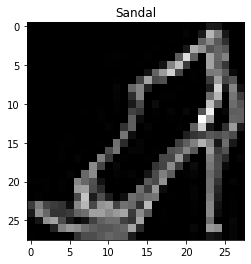

10


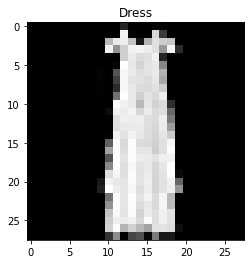

In [0]:
j=1  #initailise value just to count no of images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(5,15): #for loop 
  print(j)            #to know the count    
  plt.imshow(np.array(fashion_Train_X.iloc[[i]]).reshape(28,28), cmap = 'gray')
  plt.title(class_names[fashion_Train_Y[i]])
  plt.show(); #showing the image
  j+=1        #incrementing j value